In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load States Suspenions Data

In [2]:
from os import listdir


susp = listdir('suspensions/states')


# oss = out-of-school suspension
oss = pd.concat([pd.read_csv('suspensions/states/' + state) for state in susp])

oss = oss.drop(columns=['SWD (IDEA-Eligible)', 'SWD (Section 504 only)', 'LEP'])

oss['ID'] = oss['ID'].astype(str)
oss['ID'] = ['0' + row if len(row) < 7 else row for row in oss['ID']]

oss = oss.reset_index(drop=True)

oss = pd.get_dummies(oss, columns=['Category', 'Sex'])
oss

,Lea State,LEA,ID,Year,American Indian or Alaska Native,Asian,Hawaiian/ Pacific Islander,Hispanic,Black,White,Two or more races,Total,Category_School days missed due to out-of-school suspension,Category_Total enrollment,Sex_F,Sex_M
0,AK,Craig City School District,0200090,2015,7.0,0.0,0.0,0.0,0.0,11.0,0.0,18.0,1,0,0,1
1,AK,Craig City School District,0200090,2015,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0,1,0
2,AK,Craig City School District,0200090,2015,59.0,7.0,0.0,5.0,0.0,185.0,36.0,292.0,0,1,0,1
3,AK,Craig City School District,0200090,2015,56.0,12.0,2.0,5.0,2.0,167.0,26.0,270.0,0,1,1,0
4,AK,Sitka School District,0200240,2015,18.0,0.0,0.0,0.0,0.0,19.0,0.0,37.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35771,WY,Sublette County School District #1,5604860,2015,6.0,6.0,0.0,48.0,2.0,446.0,2.0,510.0,0,1,1,0
35772,WY,Hot Springs County School District #1,5603310,2015,2.0,0.0,0.0,0.0,0.0,67.0,0.0,69.0,1,0,0,1
35773,WY,Hot Springs County School District #1,5603310,2015,0.0,0.0,0.0,3.0,0.0,6.0,0.0,9.0,1,0,1,0
35774,WY,Hot Springs County School District #1,5603310,2015,9.0,4.0,0.0,6.0,4.0,366.0,0.0,389.0,0,1,0,1


In [3]:
# Load geographic data from Common Core data file
counties = pd.read_csv('suspensions/counties/district_geo_data.csv', encoding='latin-1')

# Need to fix LEAID's that are missing 0's
counties['LEAID'] = counties['LEAID'].astype(str)
counties['LEAID'] = ['0' + row if len(row) < 7 else row for row in counties['LEAID']]
counties

,SURVYEAR,LEAID,FIPST,LSTREE,LCITY,LSTATE,LZIP,LZIP4,LATCODE,LONGCODE,CONUM,CONAME,CD,LOCALE,CSA,CBSA,NECTA,METMIC
0,2014,0100002,1,1000 INDUSTRIAL SCHOOL ROAD,MT. MEIGS,AL,36057,66.0,33.673661,-86.628755,1073,JEFFERSON COUNTY,106,41,142,13820,N,1
1,2014,0100005,1,107 WEST MAIN STREET,ALBERTVILLE,AL,35950,25.0,34.267500,-86.208600,1095,MARSHALL COUNTY,104,32,290,10700,N,2
2,2014,0100006,1,12380 US HIGHWAY 431 S,GUNTERSVILLE,AL,35976,9351.0,34.304968,-86.286673,1095,MARSHALL COUNTY,104,42,290,10700,N,2
3,2014,0100007,1,2810 METROPOLITAN WAY,HOOVER,AL,35243,5500.0,33.406200,-86.766900,1073,JEFFERSON COUNTY,106,13,142,13820,N,1
4,2014,0100008,1,211 CELTIC DRIVE,MADISON,AL,35758,1615.0,34.687312,-86.744874,1089,MADISON COUNTY,105,21,290,26620,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18766,2014,5900200,59,HCR 74 ROUTE 1,HARTSHORNE,OK,74547,NaN,34.840378,-95.539317,40121,PITTSBURG COUNTY,4002,41,N,32540,N,2
18767,2014,6600040,66,312 ASPINALL AVENUE,AGANA,GU,96932,9008.0,13.474699,144.751357,66010,GUAM,6698,33,N,N,N,0
18768,2014,7200030,72,CALLE FEDERICO COSTAS NUM. 150,HATO REY,PR,919,759.0,18.155370,-65.987770,72129,SAN LORENZO MUNICIPIO,7298,21,490,41980,N,1
18769,2014,7800002,78,2133 HOSPITAL STREET,SAINT CROIX,VI,820,4665.0,17.702500,-64.866900,78010,ST. CROIX ISLAND,7898,33,N,N,N,0


## Merge district geographic data with suspension data

In [5]:
susp = oss.merge(counties, left_on='ID', right_on='LEAID', copy=False)

drops = ['SURVYEAR', 'FIPST', 'LEAID', 'LSTATE', 'LSTREE', 'LZIP', 'LZIP4', 'LATCODE', 'LONGCODE',
         'CD', 'LOCALE', 'CBSA', 'CSA', 'NECTA', 'METMIC']

susp = susp.drop(columns=drops)

susp['LCITY'] = susp['LCITY'] + ', ' + susp['Lea State']
susp['CONAME'] = susp['CONAME'] + ', ' + susp['Lea State']

# Filter out data to find percentage of male students
susp_m = susp[susp['Sex_M'] == 1]
susp_mtot = susp_m[susp_m['Category_Total enrollment'] == 1].reset_index(drop=True)
susp_moss = susp_m[susp_m['Category_School days missed due to out-of-school suspension'] == 1].reset_index(drop=True)
susp_moss['Pct suspensions'] = susp_moss['Total'] / susp_mtot['Total']

# Do the same for female students
susp_f = susp[susp['Sex_F'] == 1]
susp_ftot = susp_f[susp_f['Category_Total enrollment'] == 1].reset_index(drop=True)
susp_foss = susp_f[susp_f['Category_School days missed due to out-of-school suspension'] == 1].reset_index(drop=True)
susp_foss['Pct suspensions'] = susp_foss['Total'] / susp_ftot['Total']

county_moss = susp_moss.groupby('CONAME')[['Total', 'Pct suspensions']].mean().reset_index()
county_foss = susp_foss.groupby('CONAME')[['Total', 'Pct suspensions']].mean().reset_index()

county_moss = county_moss.rename(columns={'Total': 'Total OSS days'})
county_foss = county_foss.rename(columns={'Total': 'Total OSS days'})

county_foss

,CONAME,Total OSS days,Pct suspensions
0,"ABBEVILLE COUNTY, SC",94.000000,0.065097
1,"ACADIA PARISH, LA",1899.000000,0.387551
2,"ACCOMACK COUNTY, VA",463.000000,0.183512
3,"ADA COUNTY, ID",152.500000,0.022512
4,"ADAIR COUNTY, IA",0.000000,0.000000
...,...,...,...
2832,"YUKON-KOYUKUK CENSUS AREA, AK",18.333333,0.090282
2833,"YUMA COUNTY, AZ",218.833333,0.055446
2834,"YUMA COUNTY, CO",13.000000,0.031696
2835,"ZAPATA COUNTY, TX",143.000000,0.082373


## Load evictions data for cities

In [419]:
counties = pd.read_csv('evictions/cities/USA_counties.csv')
counties = counties.dropna()

lg_counties = counties[counties['population'] >= 100000]
lg_counties = lg_counties[lg_counties['year'] == 2015]

state_abbrevs = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

# All caps to match the county school district data
lg_counties['parent-location'] = [state_abbrevs.get(row) for row in lg_counties['parent-location']]
lg_counties['name'] = lg_counties['name'].str.upper() + ', ' + lg_counties['parent-location'].str.upper()

lg_counties

,GEOID,year,name,parent-location,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,...,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
32,1003,2015,"BALDWIN COUNTY, AL",AL,195121.0,9.63,23302.0,28.48,879.0,50254.0,...,0.00,1.58,0.10,649.0,476.0,2.04,2.79,0,0,0
134,1015,2015,"CALHOUN COUNTY, AL",AL,116648.0,16.49,15187.0,30.95,637.0,41703.0,...,0.01,2.09,0.02,555.0,369.0,2.43,3.65,0,0,0
474,1055,2015,"ETOWAH COUNTY, AL",AL,103766.0,15.38,12186.0,28.64,621.0,39220.0,...,0.10,1.38,0.07,648.0,441.0,3.62,5.32,0,0,0
593,1069,2015,"HOUSTON COUNTY, AL",AL,103534.0,14.62,15047.0,35.30,691.0,41571.0,...,0.02,1.72,0.10,458.0,317.0,2.11,3.04,0,0,0
627,1073,2015,"JEFFERSON COUNTY, AL",AL,659026.0,15.04,97832.0,36.81,810.0,45610.0,...,0.02,1.06,0.19,5329.0,905.0,0.93,5.45,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52839,55117,2015,"SHEBOYGAN COUNTY, WI",WI,115226.0,6.80,13944.0,29.32,658.0,53713.0,...,0.01,1.44,0.02,388.0,300.0,2.15,2.78,0,0,0
52924,55127,2015,"WALWORTH COUNTY, WI",WI,103039.0,8.05,13166.0,31.86,812.0,53445.0,...,0.10,1.10,0.28,327.0,192.0,1.46,2.48,1,0,0
52958,55131,2015,"WASHINGTON COUNTY, WI",WI,132921.0,3.61,12161.0,21.95,829.0,69237.0,...,0.00,1.31,0.03,242.0,145.0,1.19,1.99,1,0,0
52975,55133,2015,"WAUKESHA COUNTY, WI",WI,393873.0,3.54,38261.0,23.66,933.0,76545.0,...,0.02,1.35,0.06,504.0,234.0,0.61,1.32,1,0,0


## Merge large cities data with suspension data

In [421]:
county_suspm = lg_counties.merge(county_moss, left_on='name', right_on='CONAME', copy=False)
county_suspf = lg_counties.merge(county_foss, left_on='name', right_on='CONAME', copy=False)
county_suspm

,GEOID,year,name,parent-location,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,...,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed,CONAME,Total OSS days,Pct suspensions
0,1003,2015,"BALDWIN COUNTY, AL",AL,195121.0,9.63,23302.0,28.48,879.0,50254.0,...,649.0,476.0,2.04,2.79,0,0,0,"BALDWIN COUNTY, AL",5141.000000,0.325978
1,1015,2015,"CALHOUN COUNTY, AL",AL,116648.0,16.49,15187.0,30.95,637.0,41703.0,...,555.0,369.0,2.43,3.65,0,0,0,"CALHOUN COUNTY, AL",877.250000,0.668420
2,1055,2015,"ETOWAH COUNTY, AL",AL,103766.0,15.38,12186.0,28.64,621.0,39220.0,...,648.0,441.0,3.62,5.32,0,0,0,"ETOWAH COUNTY, AL",418.500000,0.154751
3,1069,2015,"HOUSTON COUNTY, AL",AL,103534.0,14.62,15047.0,35.30,691.0,41571.0,...,458.0,317.0,2.11,3.04,0,0,0,"HOUSTON COUNTY, AL",801.500000,0.162568
4,1073,2015,"JEFFERSON COUNTY, AL",AL,659026.0,15.04,97832.0,36.81,810.0,45610.0,...,5329.0,905.0,0.93,5.45,0,0,0,"JEFFERSON COUNTY, AL",2147.538462,0.385446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,55117,2015,"SHEBOYGAN COUNTY, WI",WI,115226.0,6.80,13944.0,29.32,658.0,53713.0,...,388.0,300.0,2.15,2.78,0,0,0,"SHEBOYGAN COUNTY, WI",85.750000,0.043491
457,55127,2015,"WALWORTH COUNTY, WI",WI,103039.0,8.05,13166.0,31.86,812.0,53445.0,...,327.0,192.0,1.46,2.48,1,0,0,"WALWORTH COUNTY, WI",129.500000,0.124362
458,55131,2015,"WASHINGTON COUNTY, WI",WI,132921.0,3.61,12161.0,21.95,829.0,69237.0,...,242.0,145.0,1.19,1.99,1,0,0,"WASHINGTON COUNTY, WI",163.500000,0.085653
459,55133,2015,"WAUKESHA COUNTY, WI",WI,393873.0,3.54,38261.0,23.66,933.0,76545.0,...,504.0,234.0,0.61,1.32,1,0,0,"WAUKESHA COUNTY, WI",150.636364,0.051086


### Initial scatterplot for # evictions and # suspension days

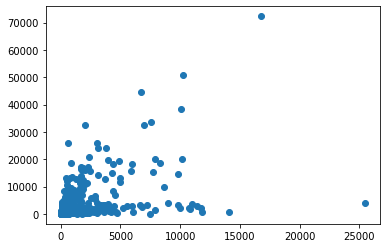

In [422]:
x_msus = county_suspm['evictions']
y_msus = county_suspm['Total OSS days']

plt.scatter(x_msus, y_msus)
plt.show()

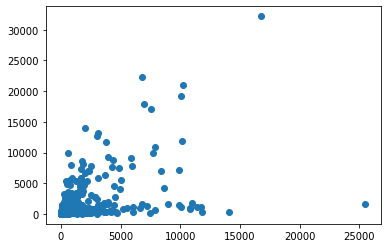

In [423]:
x_fsus = county_suspf['evictions']
y_fsus = county_suspf['Total OSS days']

plt.scatter(x_fsus, y_fsus)
plt.show()